In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [37]:
data=pd.read_csv(r'C:\Users\Tunzale\Desktop\DSDS\yeni\default of credit card clients (1).csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [38]:
pd.set_option('display.max_columns',40)
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [39]:
data.dtypes

ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [40]:
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)
categorical_cols

['SEX', 'EDUCATION', 'MARRIAGE']

In [41]:
num=(data.dtypes=='int64')
numerical_cols=list(num[num].index)
numerical_cols

['ID',
 'LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

In [42]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [43]:
data.corr()['default']

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_2136\2983125872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['default']


ID          -0.013952
LIMIT_BAL   -0.153520
AGE          0.013890
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
default      1.000000
Name: default, dtype: float64

In [44]:
data.corr()['default'].mean()

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_2136\1690167652.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['default'].mean()


0.08429769769160686

In [45]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [46]:
data=data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ,'default']]
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,1
1,120000,female,university,single,26,-1,2,0,0,0,2,1
2,90000,female,university,single,34,0,0,0,0,0,0,0
3,50000,female,university,married,37,0,0,0,0,0,0,0
4,50000,male,university,married,57,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,0,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,0,1
29998,80000,male,high school,married,41,1,-1,0,0,0,-1,1


In [47]:
data.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
default       int64
dtype: object

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.916453,LIMIT_BAL
1,2.764897,AGE
2,1.897565,PAY_0
3,3.124615,PAY_2
4,3.638842,PAY_3
5,4.342058,PAY_4
6,4.850747,PAY_5
7,3.322358,PAY_6


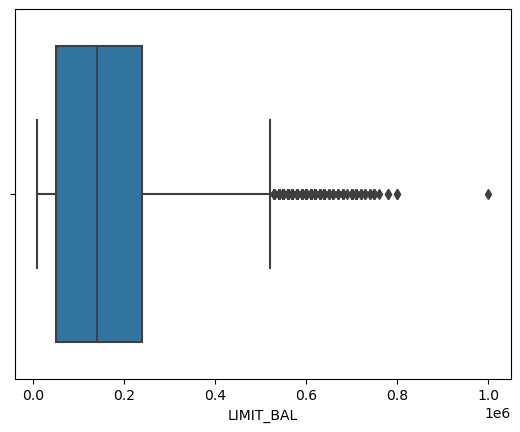

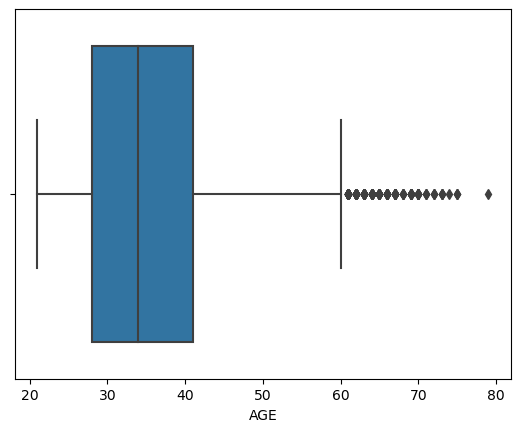

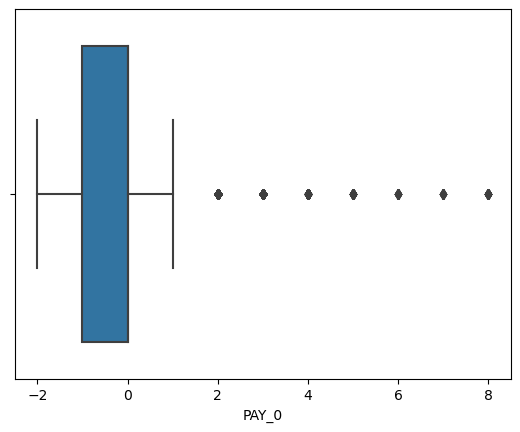

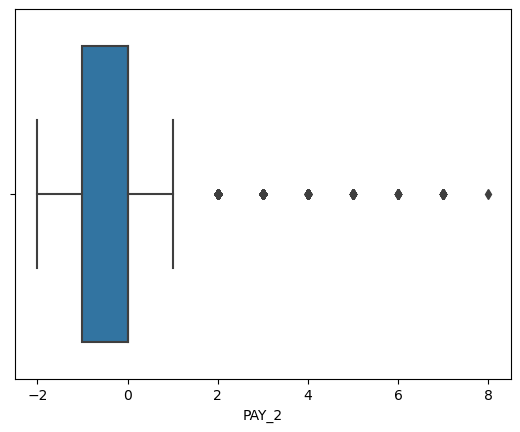

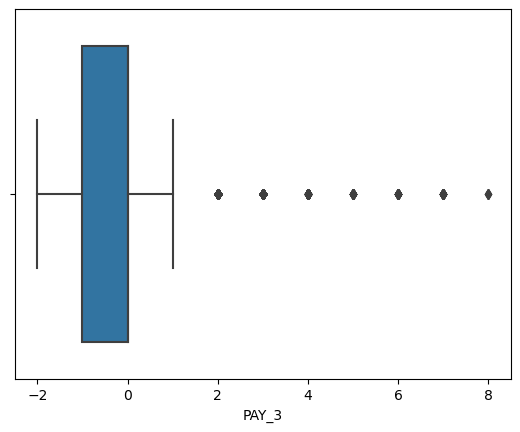

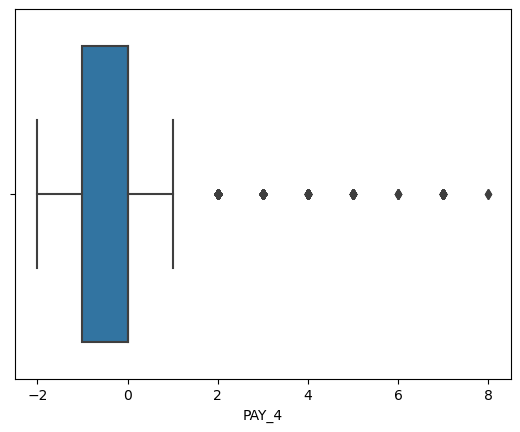

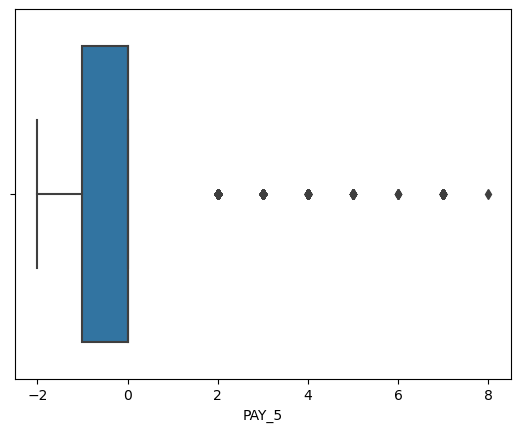

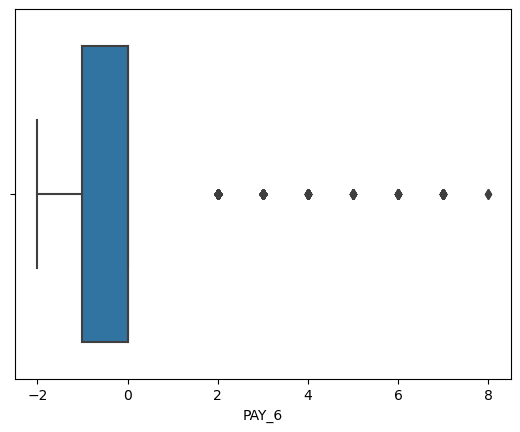

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [50]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_2136\3326136409.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
C:\Users\Tunzale\AppData\Local\Temp\ipykernel_2136\3326136409.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [51]:
for i in data[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_2136\786590178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\Tunzale\AppData\Local\Temp\ipykernel_2136\786590178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


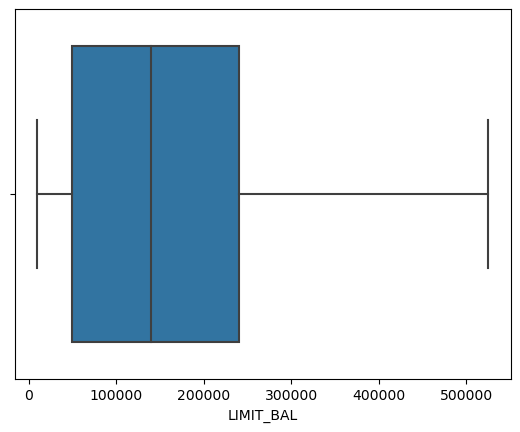

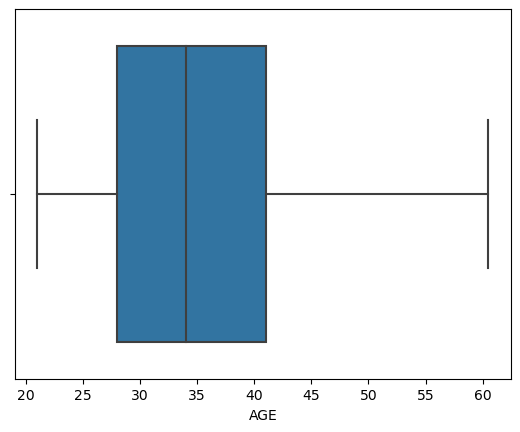

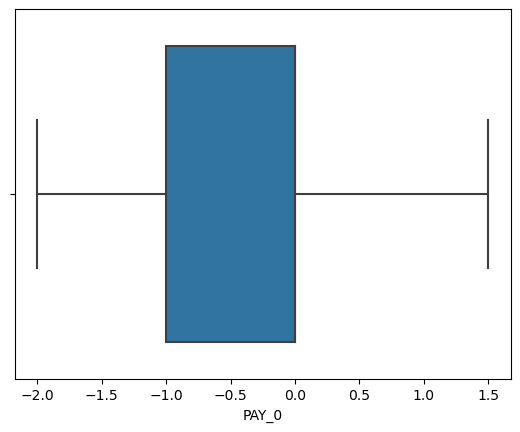

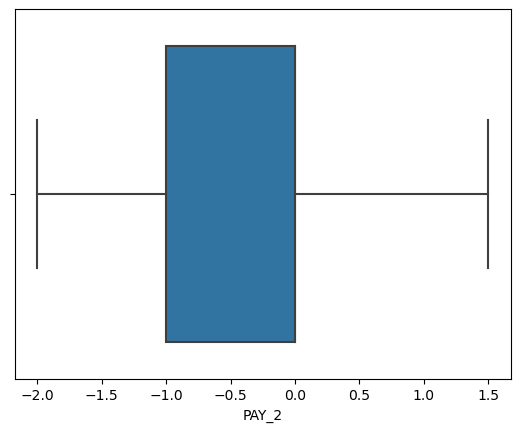

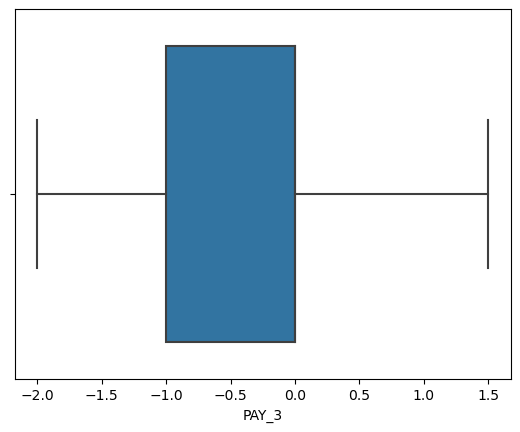

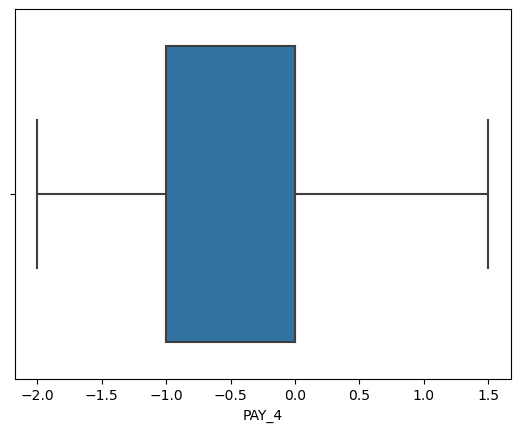

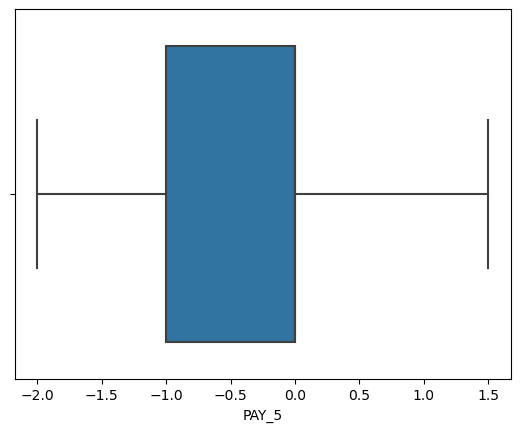

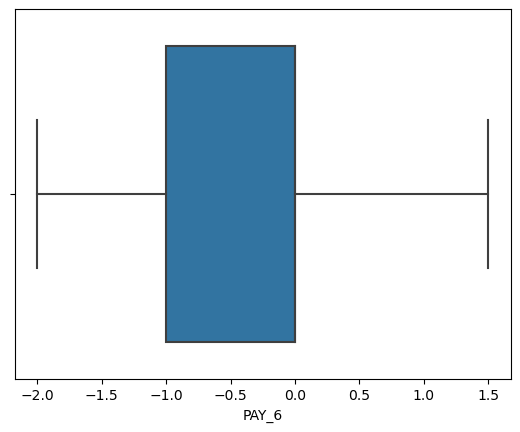

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [53]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default'],
      dtype='object')

In [54]:
inputs = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
output = data['default']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

In [57]:
pip install xgboost

In [58]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier

In [61]:
data.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
default        int64
dtype: object

In [62]:
catboost_model = CatBoostClassifier(cat_features=['SEX', 'EDUCATION','MARRIAGE'])

In [63]:
catboost_model.fit(X_train, y_train)

Learning rate set to 0.037803
0:	learn: 0.6721278	total: 33ms	remaining: 33s
1:	learn: 0.6527218	total: 63.8ms	remaining: 31.9s
2:	learn: 0.6351981	total: 89ms	remaining: 29.6s
3:	learn: 0.6190964	total: 120ms	remaining: 29.9s
4:	learn: 0.6041075	total: 150ms	remaining: 29.8s
5:	learn: 0.5904095	total: 182ms	remaining: 30.2s
6:	learn: 0.5779314	total: 250ms	remaining: 35.5s
7:	learn: 0.5664471	total: 281ms	remaining: 34.9s
8:	learn: 0.5558537	total: 312ms	remaining: 34.4s
9:	learn: 0.5463976	total: 344ms	remaining: 34s
10:	learn: 0.5377025	total: 374ms	remaining: 33.6s
11:	learn: 0.5294433	total: 402ms	remaining: 33.1s
12:	learn: 0.5221531	total: 432ms	remaining: 32.8s
13:	learn: 0.5153650	total: 463ms	remaining: 32.6s
14:	learn: 0.5089149	total: 497ms	remaining: 32.6s
15:	learn: 0.5031182	total: 527ms	remaining: 32.4s
16:	learn: 0.4982918	total: 549ms	remaining: 31.7s
17:	learn: 0.4938512	total: 579ms	remaining: 31.6s
18:	learn: 0.4891680	total: 609ms	remaining: 31.5s
19:	learn: 0.485

In [64]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 52.168715213358084
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.65      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6664  376]
 [1255  705]]


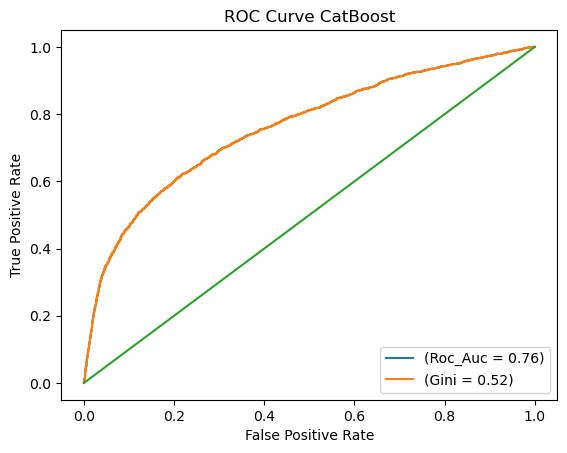

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

In [74]:
data = pd.get_dummies(data, drop_first=True)
data

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0,0,0,0,1,0,0
1,120000.0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,1,0,0,0,0,1,0,1
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,1,1,0,0,0,0,1
29997,30000.0,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,1,1,0,0,0,1,0,1
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1,1,1,0,0,0,0,0


In [76]:
inputs = data.drop('default', axis=1)
output = data['default']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [79]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_lgb = evaluate(xgb_clf, X_test, y_test)

Model Performance
Gini prob is 48.410685296846
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7040
           1       0.61      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6583  457]
 [1260  700]]


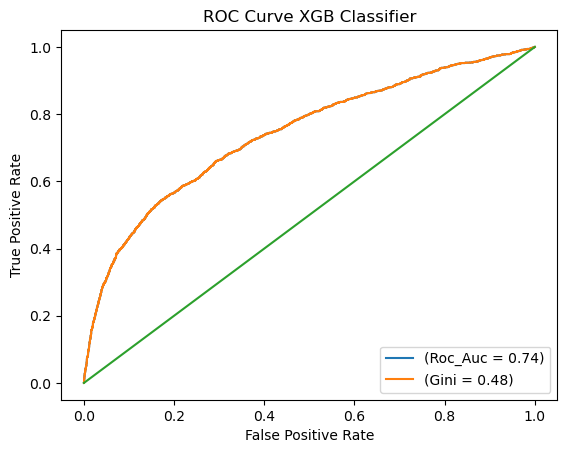

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

In [82]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193


LGBMClassifier()

In [83]:
result_lgb = evaluate(lgb_clf, X_test, y_test)

Model Performance
Gini prob is 51.888131957328376
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6663  377]
 [1243  717]]


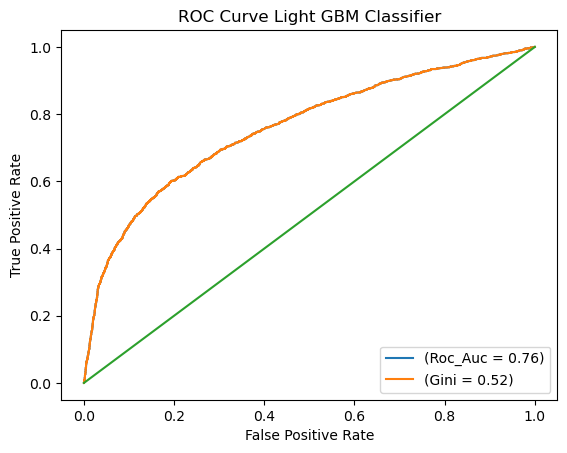

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = lgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light GBM Classifier')

plt.legend(loc='lower right')
plt.show()

In [85]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)

Learning rate set to 0.037803
0:	learn: 0.6721481	total: 13.4ms	remaining: 13.4s
1:	learn: 0.6536602	total: 21ms	remaining: 10.5s
2:	learn: 0.6358077	total: 28.7ms	remaining: 9.53s
3:	learn: 0.6195164	total: 35.4ms	remaining: 8.81s
4:	learn: 0.6044075	total: 42.4ms	remaining: 8.44s
5:	learn: 0.5905787	total: 49.2ms	remaining: 8.15s
6:	learn: 0.5779099	total: 56.2ms	remaining: 7.98s
7:	learn: 0.5668440	total: 62.9ms	remaining: 7.8s
8:	learn: 0.5564318	total: 70ms	remaining: 7.71s
9:	learn: 0.5471880	total: 77.1ms	remaining: 7.63s
10:	learn: 0.5384054	total: 84.1ms	remaining: 7.56s
11:	learn: 0.5304690	total: 90ms	remaining: 7.41s
12:	learn: 0.5229452	total: 98.4ms	remaining: 7.47s
13:	learn: 0.5156860	total: 106ms	remaining: 7.45s
14:	learn: 0.5092742	total: 113ms	remaining: 7.42s
15:	learn: 0.5033796	total: 120ms	remaining: 7.37s
16:	learn: 0.4978066	total: 127ms	remaining: 7.33s
17:	learn: 0.4930172	total: 133ms	remaining: 7.27s
18:	learn: 0.4885158	total: 140ms	remaining: 7.24s
19:	l

In [94]:
result_cb = evaluate(cb_clf, X_test, y_test)

Model Performance
Gini prob is 51.529641117810755
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.64      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6639  401]
 [1241  719]]


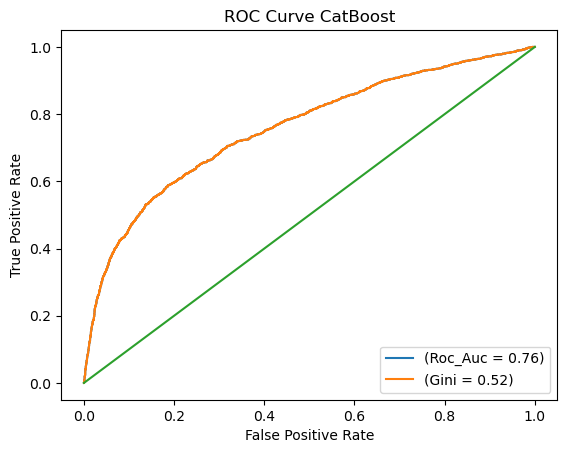

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = cb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

In [86]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [87]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [88]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [89]:
optimized_model_xgb = random_search_lgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

Model Performance
Gini prob is 50.23541859925788
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000

[[7040    0]
 [1960    0]]


C:\Users\Tunzale\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tunzale\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tunzale\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000], 
 
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7), 
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [91]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6875704	total: 10.3ms	remaining: 10.3s
1:	learn: 0.6822519	total: 19.4ms	remaining: 9.65s
2:	learn: 0.6769195	total: 29ms	remaining: 9.65s
3:	learn: 0.6720409	total: 38.4ms	remaining: 9.56s
4:	learn: 0.6670817	total: 45.2ms	remaining: 9s
5:	learn: 0.6622679	total: 51.4ms	remaining: 8.52s
6:	learn: 0.6575260	total: 59.2ms	remaining: 8.4s
7:	learn: 0.6527539	total: 67.4ms	remaining: 8.35s
8:	learn: 0.6481755	total: 76ms	remaining: 8.37s
9:	learn: 0.6437313	total: 83.6ms	remaining: 8.28s
10:	learn: 0.6392947	total: 91.5ms	remaining: 8.23s
11:	learn: 0.6350423	total: 99.3ms	remaining: 8.18s
12:	learn: 0.6308645	total: 107ms	remaining: 8.11s
13:	learn: 0.6268092	total: 113ms	remaining: 7.95s
14:	learn: 0.6227593	total: 121ms	remaining: 7.94s
15:	learn: 0.6188716	total: 127ms	remaining: 7.82s
16:	learn: 0.6150011	total: 133ms	remaining: 7.69s
17:	learn: 0.6114032	total: 140ms	remaining: 7.64s
18:	learn: 0.6077134	total: 147ms	remaining: 7.58s
19:	learn: 0.6041549	total: 154ms	rem

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001819F2D1E50>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [92]:
print("Best Hyperparameters for CB: ", random_search_cb.best_params_)

Best Hyperparameters for CB:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [93]:
optimized_model_cb = random_search_cb.best_estimator_
optmized_accuracy_cb = evaluate(optimized_model_cb, X_test, y_test)

Model Performance
Gini prob is 52.97601895871984
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6677  363]
 [1260  700]]


In [96]:
pip install --upgrade mlxtend

Note: you may need to restart the kernel to use updated packages.


In [97]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [98]:
base_classifiers = [
    LGBMClassifier(),
    XGBClassifier()
]


In [99]:
meta_classifier = CatBoostClassifier()

In [100]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [101]:
stacking_classifier.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3740, number of negative: 13060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222619 -> initscore=-1.250469
[LightGBM] [Info] Start training from score -1.250469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
Learning rate set to 0.037803
0:	learn: 0.6712567	total: 8.9ms	remaining: 8.89s
1:	learn: 0.6513518	total: 17.7ms	remaining: 8.82s
2:	learn: 0.6335335	total: 25.6ms	remaining: 8.52s
3:	learn: 0.6169785	total: 34.1ms	remaining: 8.49s
4:	learn: 0.6018445	total: 42.3ms	remaining: 8.43s
5:	learn: 0.5880194	total: 50.7ms	remaining: 8.39s
6:	learn: 0.5759464	total: 60

StackingCVClassifier(classifiers=[LGBMClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=N...
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x000001819EDA9A10>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [102]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

Model Performance
Gini prob is 51.07335633116885
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.64      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000

[[6657  383]
 [1267  693]]


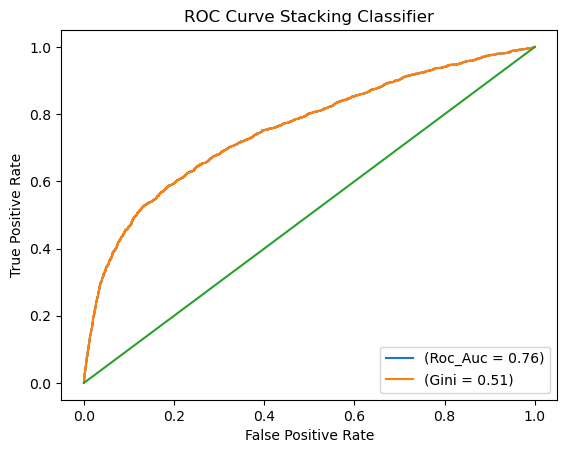

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()